### Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

### Constants

In [13]:
basedir = Path("/Users/tusharsingh/Work/Project/tcga-mldl")
plotdir = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/plots")
features = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/data/features.csv")
target = Path("/Users/tusharsingh/Work/Project/tcga-mldl/results/data/target.csv")

### Load Data

In [3]:
X = pd.read_csv(features , index_col = 0 )
y = pd.read_csv(target , index_col = 0)

### Selection Function

In [4]:
def select_top_k_percent(X, y, percent):
    k = int(percent * X.shape[1])
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    selected_cols = X.columns[selector.get_support()]
    return pd.DataFrame(X_new, columns=selected_cols, index=X.index)

In [5]:
# different % of genes
X_5pct   = select_top_k_percent(X, y.severity.values, percent=0.05)
X_15pct  = select_top_k_percent(X, y.severity.values, percent=0.15)
X_25pct  = select_top_k_percent(X, y.severity.values, percent=0.25)

# shapes
print("Top 5% genes shape: ", X_5pct.shape)
print("Top 15% genes shape:", X_15pct.shape)
print("Top 25% genes shape:", X_25pct.shape)


Top 5% genes shape:  (510, 1956)
Top 15% genes shape: (510, 5870)
Top 25% genes shape: (510, 9784)


### Plotting

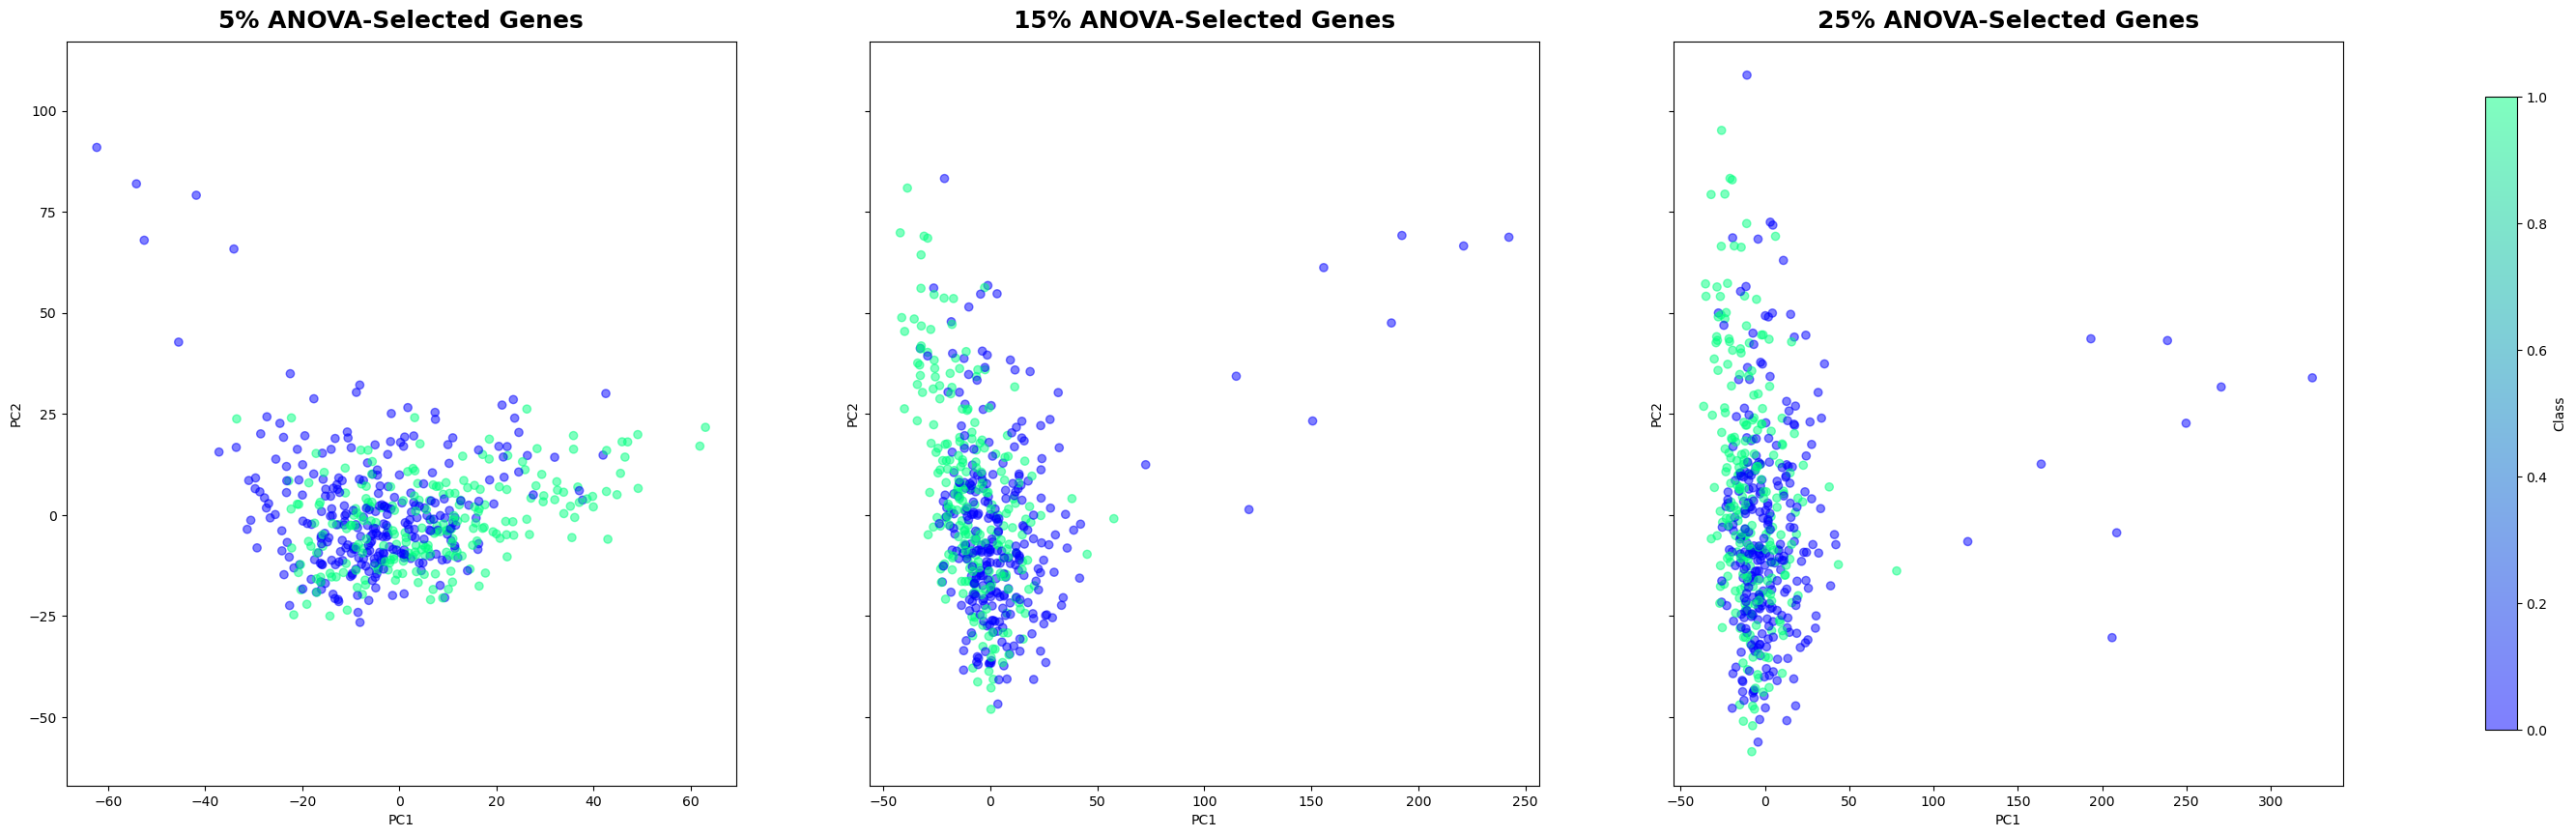

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare dictionary of gene sets
gene_sets = {
    "5% ANOVA-Selected Genes": X_5pct,
    "15% ANOVA-Selected Genes": X_15pct,
    "25% ANOVA-Selected Genes": X_25pct
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(38, 10), sharey=True)

for ax, (label, X_sel) in zip(axes, gene_sets.items()):
    # Standardize
    X_scaled = StandardScaler().fit_transform(X_sel)

    # PCA
    X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

    # Scatter plot
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y['severity'].values,
                         cmap='winter', alpha=0.5)

    ax.set_title(label, weight ="bold" , pad = 10 , fontsize =18)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.grid(False)

# Add shared colorbar
cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), label='Class', shrink=0.85)
# plt.tight_layout()
plt.savefig(plotdir/"pca_plot.png", bbox_inches="tight", dpi=300)
plt.show()

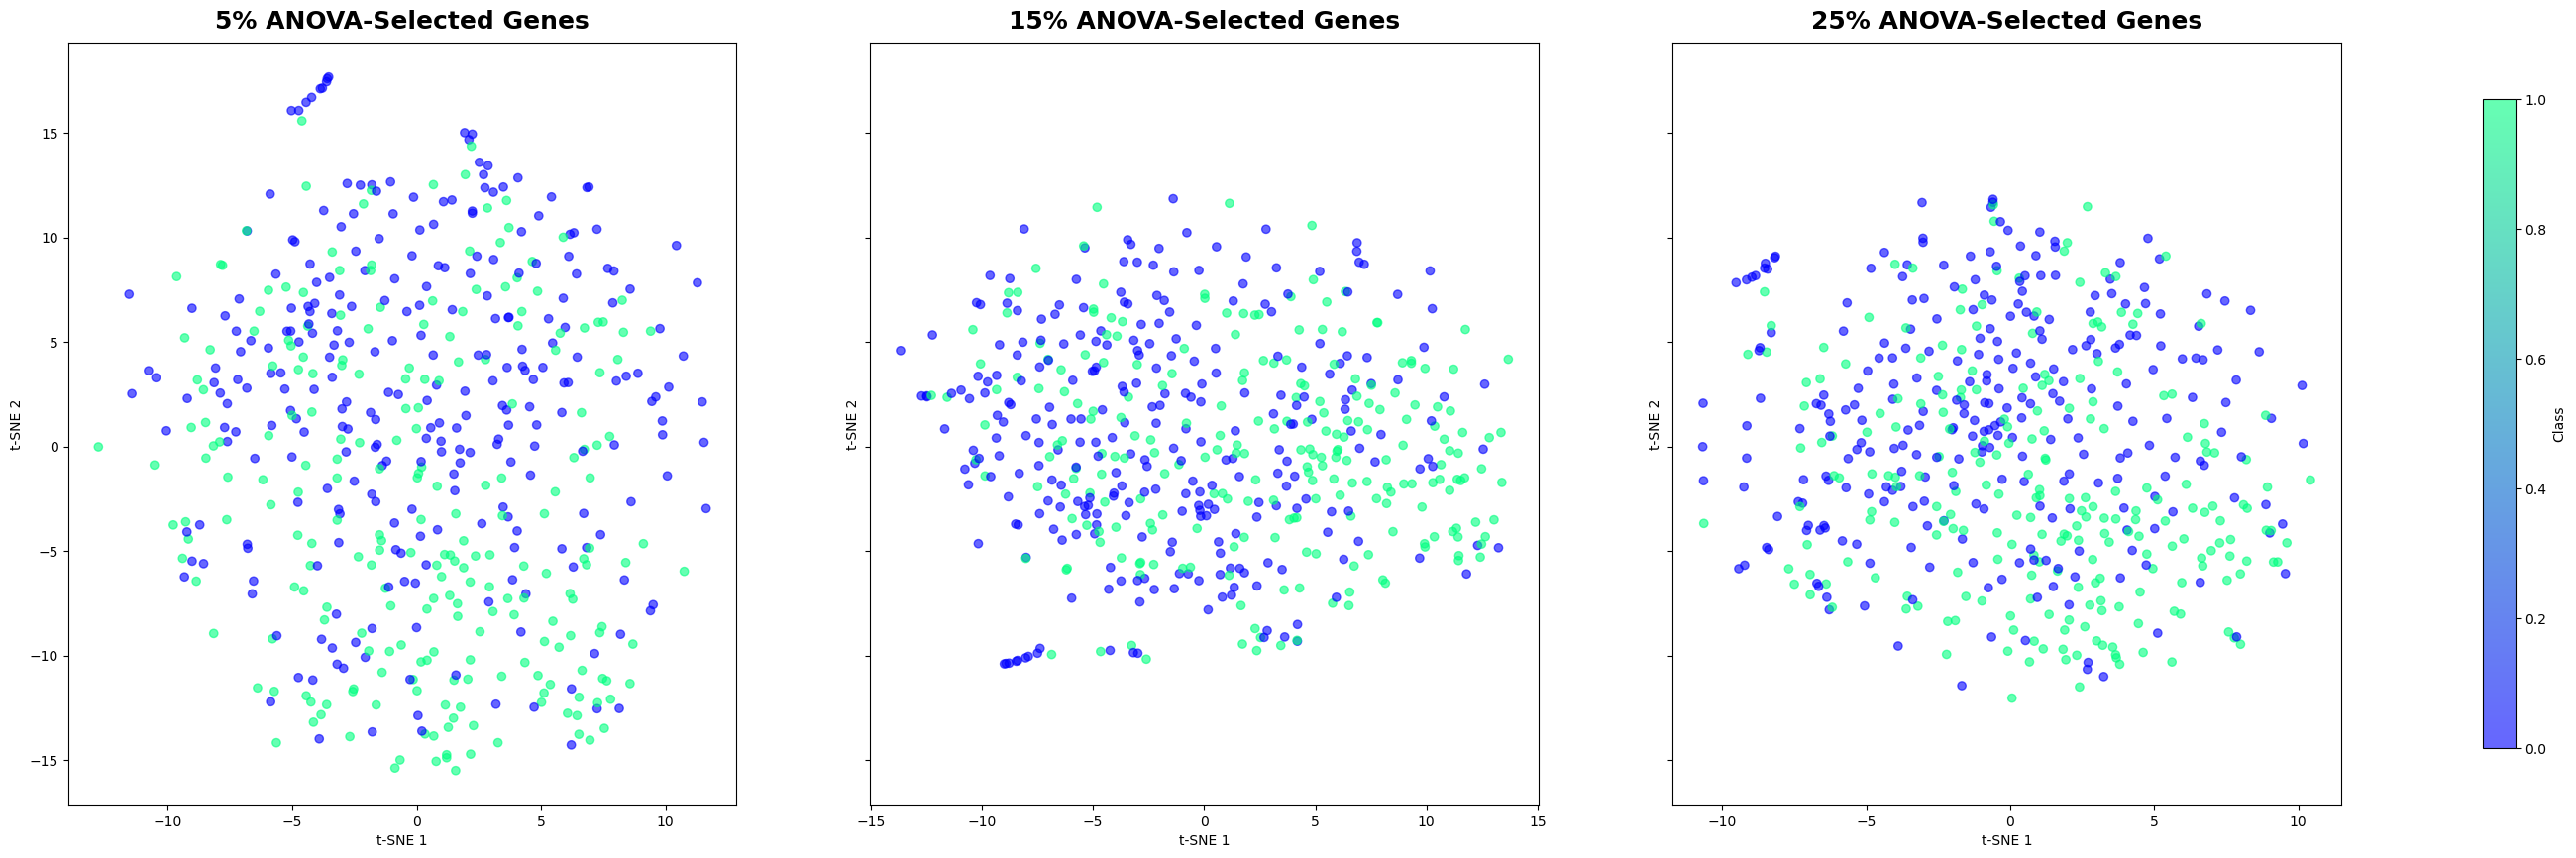

In [17]:
# Prepare dictionary of gene sets
gene_sets = {
    "5% ANOVA-Selected Genes": X_5pct,
    "15% ANOVA-Selected Genes": X_15pct,
    "25% ANOVA-Selected Genes": X_25pct
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(37, 10), sharey=True)

for ax, (label, X_sel) in zip(axes, gene_sets.items()):
    # Standardize
    X_scaled = StandardScaler().fit_transform(X_sel)

    # t-SNE projection
    tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Scatter plot
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y['severity'].values,
                         cmap='winter', alpha=0.6)

    ax.set_title(label,weight ="bold" , pad = 10 , fontsize =18)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.grid(False)

# Add shared colorbar
cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), label='Class', shrink=0.85)
# plt.tight_layout()
plt.savefig(plotdir/"t-sne_plot.png", bbox_inches="tight", dpi=300)
plt.show()


### Save Data

In [8]:
X_5pct.to_csv(basedir/"results"/"data"/"X_5pct.csv" )
X_15pct.to_csv(basedir/"results"/"data"/"X_15pct.csv" )
X_25pct.to_csv(basedir/"results"/"data"/"X_25pct.csv" )

In [9]:
X_5pct.shape , X_15pct.shape, X_25pct.shape

((510, 1956), (510, 5870), (510, 9784))